In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv', sep = ',')

In [112]:
df 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
data = df.dropna() #удфляем строки с пустыми значениямми

In [115]:
data = data.drop (columns = ['Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                  'Other_Sales', 'Global_Sales', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])
data #удаляем ненужные столбцы

,Name,Platform,Genre,Critic_Score
0,Wii Sports,Wii,Sports,76.0
2,Mario Kart Wii,Wii,Racing,82.0
3,Wii Sports Resort,Wii,Sports,80.0
6,New Super Mario Bros.,DS,Platform,89.0
7,Wii Play,Wii,Misc,58.0
...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,Action,46.0
16677,Mortal Kombat: Deadly Alliance,GBA,Fighting,81.0
16696,Metal Gear Solid V: Ground Zeroes,PC,Action,80.0
16700,Breach,PC,Shooter,61.0


In [111]:
datasport = data.loc[data['Genre'] == 'Sports'] #формируем выборку с играми в жанре спорт

In [74]:
datasport

,Name,Platform,Genre,Critic_Score
0,Wii Sports,Wii,Sports,76.0
3,Wii Sports Resort,Wii,Sports,80.0
13,Wii Fit,Wii,Sports,80.0
15,Wii Fit Plus,Wii,Sports,80.0
77,FIFA 16,PS4,Sports,82.0
...,...,...,...,...
16148,Don Bradman Cricket 14,PS3,Sports,73.0
16233,Madden NFL 13,PS3,Sports,83.0
16380,Tiger Woods PGA Tour 2005,PC,Sports,91.0
16532,Pro Evolution Soccer 2010,PC,Sports,78.0


In [85]:
critic_score = data['Critic_Score']
crit_sport = datasport['Critic_Score']
#H0 - средняя оценка критиков в генеральной совокупности и выборке статистически зхначимо не отличается
#H1 - средняя оценка критиков в генеральной совокупности и выборке статистически зхначимо отличается

critic_score.mean()
stat, p = stats.ttest_1samp(a=crit_sport, popmean=critic_score.mean())
print(f"Статистика = {stat:.3f}, p = {p:.20f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средняя оценка критиков выборки, вероятно, не отличается от генеральной совокупности ")
else:
    print("Отклоняем нулевую гипотезу, средняя оценка критиков выборки, вероятно, отличается от генеральной совокупности ")

Статистика = 9.078, p = 0.00000000000000000063
Отклоняем нулевую гипотезу, средняя оценка критиков выборки, вероятно, отличается от генеральной совокупности 


In [87]:
critic_score.mean()

70.27208791208791

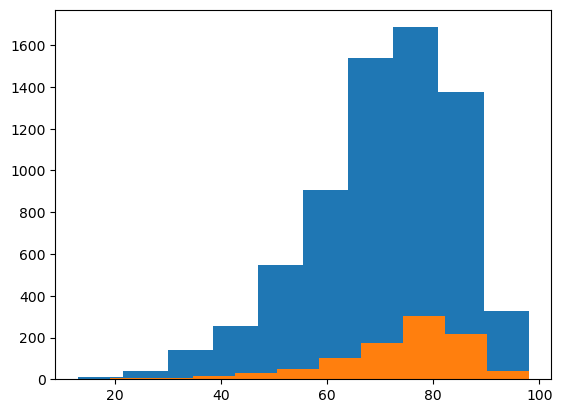

In [79]:
plt.hist(critic_score, bins=10); 
plt.hist(crit_sport, bins=10);

In [95]:
datapc = data[data['Platform'] == 'PC'] #формируем выборку с играми на РС
datapc = datapc['Critic_Score']

In [96]:
dataps = data [data['Platform'] == 'PS4' ] #Формируем выборку с играми на PS4
dataps = dataps['Critic_Score']

In [98]:
stat, p = stats.ttest_ind(datapc, dataps)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
    

Статистика = 4.171, p = 0.000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


(array([ 2.,  1.,  3.,  7., 10., 28., 65., 68., 47.,  8.]),
 array([19. , 26.8, 34.6, 42.4, 50.2, 58. , 65.8, 73.6, 81.4, 89.2, 97. ]),
 <BarContainer object of 10 artists>)

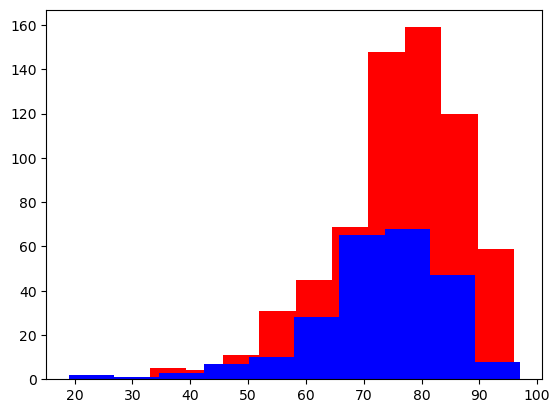

In [440]:
plt.hist(datapc, color = 'r') #статистически можно предположить, что критикам больше нравятся игры на РС
plt.hist(dataps, color = 'blue')

In [116]:
datashoot = data[data['Genre'] == 'Shooter'] #создаем выборки со стрелялками и стратегиями
datashoot = datashoot['Critic_Score']
datastrat = data[data['Genre'] == 'Strategy']
datastrat = datastrat['Critic_Score']

In [117]:
stat, p = stats.ttest_ind(datashoot, datastrat)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -2.223, p = 0.026
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [127]:
#можно предположить, что статистически критикам больше нравятся стратегии

<AxesSubplot:xlabel='Genre', ylabel='Critic_Score'>

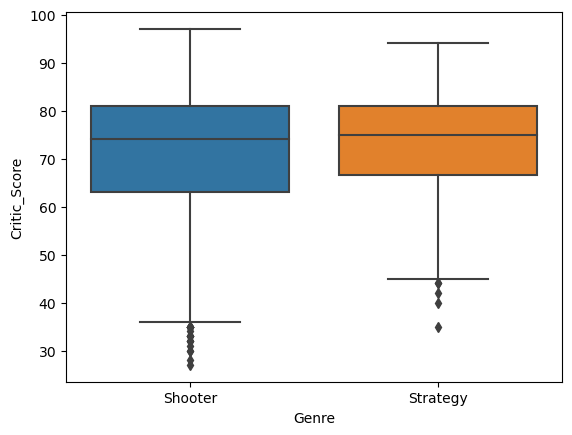

In [131]:
sns.boxplot(data = datam,  x ='Genre', y ='Critic_Score')

In [345]:
df = pd.read_csv('spam-2.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [346]:
df['Message'] = df['Message'].str.lower() #приводим к нижнему регистру
df

df['Message'] = df['Message'].replace(to_replace = ['[\W_]+', ' '], value = ' ', regex = True) #убираем служебные символы
df


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [347]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexa_yakovleva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [348]:
import nltk #токенизируем и удаляем стоп-слова
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_set = stopwords.words('english')
tokens = []
stopwords_cleaned = []

for text in df['Message']:
    text = word_tokenize(text)
    tokens.append(text)
    text = [word for word in text if word not in stopwords_set]
    stopwords_cleaned.append(text)
df['token']= tokens
df['nostop'] = stopwords_cleaned


In [349]:
df

,Category,Message,token,nostop
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]"
5570,ham,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin..."


In [350]:
from nltk.stem import WordNetLemmatizer #лемматизируем сообщения
lemmatizer = WordNetLemmatizer()
lemma_text = []
for text in df['nostop']:
    text = [lemmatizer.lemmatize(word) for word in text]
    lemma_text.append(text)
df['lemma_text'] = lemma_text

In [351]:
df

,Category,Message,token,nostop,lemma_text
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,ham,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


In [365]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer()
df['lemma_mes'] = df['lemma_text'].apply(','.join) #Преобразуем список в строку
tfidf_matrix = tfidf.fit_transform(df.lemma_mes) #Преобразуем все сообщения в вектора TF-IDF. 
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
from sklearn.linear_model import LogisticRegression #строим модель регрессии
from sklearn.model_selection import train_test_split


In [379]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.3, random_state=42)

In [380]:
model = LogisticRegression() #обучаем модель
model.fit(x_train, y_train)



LogisticRegression()

In [381]:
y_pred = model.predict(x_test) #делаем прогноз
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [382]:
model.score(x_test, y_test) # хороший показатель

0.958732057416268

In [384]:
from sklearn.metrics import confusion_matrix #матрица ошибок тоже говорит о том, что точность модели довольно высокая
confusion_matrix = confusion_matrix(y_test, y_pred, labels = ['ham', 'spam'])
print(confusion_matrix)

[[1445    3]
 [  66  158]]


In [386]:
tn, fp, fn, tp = confusion_matrix.ravel()
tn, fp, fn, tp

(1445, 3, 66, 158)

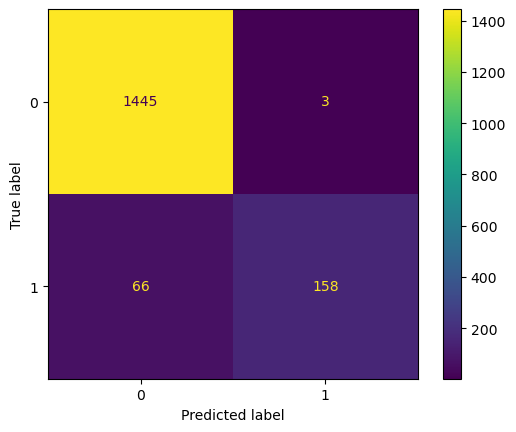

In [389]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix).plot()



In [395]:
 new_frame = pd.DataFrame(y_test) #создаем датафрейм с тестовой выборкой

In [397]:
new_frame['y_pred'] = y_pred #добавляем прогноз

In [412]:
new_frame =new_frame[new_frame['Category']!=new_frame['y_pred']] #выбираем только те случаи, где прогноз ошибся
new_frame

,Category,y_pred
2952,ham,spam
881,spam,ham
1961,spam,ham
3864,spam,ham
2575,spam,ham
...,...,...
4543,spam,ham
752,spam,ham
309,spam,ham
495,ham,spam


In [437]:
data = pd.read_csv('spam-2.csv')

In [438]:
new_frame.merge(data, left_index = True, right_index = True)   #создаем датафрейм с изначальным текстом сообщений

,Category_x,y_pred,Category_y,Message
2952,ham,spam,ham,Hey now am free you can call me.
881,spam,ham,spam,Reminder: You have not downloaded the content ...
1961,spam,ham,spam,Guess what! Somebody you know secretly fancies...
3864,spam,ham,spam,Oh my god! I've found your number again! I'm s...
2575,spam,ham,spam,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...,...
4543,spam,ham,spam,FreeMsg Hi baby wow just got a new cam moby. W...
752,spam,ham,spam,You have an important customer service announc...
309,spam,ham,spam,TheMob> Check out our newest selection of cont...
495,ham,spam,ham,Are you free now?can i call now?
